<center>
<img src="https://i.ibb.co/ZVRt2f7/logo.png" alt="logo" border="0" width=800>


---
## 01. First Neural Network


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we will implement a simple neural network to represent a linear model.

---

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## The Dataset

We will use the following dataset including 10 temperatures given in Celsius and Fahrenheit degrees.

In [2]:
celsius = np.array([-40., -30., -10., -5., 0., 8., 15., 22., 38., 50.])
fahrenheit = np.array([-40. , -22. ,  14. ,  23. ,  32. ,  46.4,  59. ,  71.6, 100.4,
       122. ])


df = pd.DataFrame(celsius, columns=['C'] )
df['F'] = fahrenheit
df

,C,F
0,-40.0,-40.0
1,-30.0,-22.0
2,-10.0,14.0
3,-5.0,23.0
4,0.0,32.0
5,8.0,46.4
6,15.0,59.0
7,22.0,71.6
8,38.0,100.4
9,50.0,122.0



---

## Building our first neural network

We will use the framwork [Keras](https://keras.io) to create the layers of the neural network. In this simple case, we will use only two layers: 

- The input layer with one neuron
- The output layer with one neuron

The first command creates a [Sequential Model](https://keras.io/guides/sequential_model/) in which each layer has only one input tensor and one output tensor. 

Then, we add the input layer with one neuron and the output as a dense later (in this case the dense characteristic just give the connection between the input and output layers).



In [3]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,))) # Input layer
model.add(tf.keras.layers.Dense(1)) # Output layer 

It is also possible to define the model defining the output layer together with the option  `input_shape=[1]`, which will create the input layer, and after defining the model with this layer.


In [ ]:
#layer = tf.keras.layers.Dense(units=1, input_shape=[1])

#model = tf.keras.Sequential([layer])

Finally, it is also possible to define the model as

In [ ]:
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

NOte that we have NOT included the definition of an 'activation function'. However, the model definition defines as default a 'linear activation function'.

---
The next step is to compile the model using and 'optimizer' and a 'cost' or 'loss function'.

### The Optimizer

The 'optimizer' will define how is performed the adjust of weigths and bias in order to allow that the algorithm learns (and not un-learns). We have seen the simplest method based on the **Gradient descent** method in which 
\begin{equation}
w_{t+1} = w_{t} - \alpha \frac{\partial f_C}{\partial w}
\end{equation}
where $\alpha$ is the learning rate. 

However there are other methods and/or modifications to this idea. For example, the **Momentum** method incorporates the average of past gradients to accelerate the convergence. This is given by the equation
\begin{equation}
w_{t+1} = w_{t} - \alpha m_t
\end{equation}
where
\begin{equation}
m_t = (1-\beta) \frac{\partial f_C}{\partial w} + \beta m_{t-1}
\end{equation}
and

- $m_{t}$ : aggreagate of gradients at time $t$ (current time)
- $m_{t-1}$ : aggregate of gradients at time $t-1$ (previous time)
- $\beta$ : average parameter ($\sim 0.9$)


The **R**oot **M**ean **S**quare **P**ropagation (**RMSP** or **RMSprop**) method takes an exponential moving average of the gradients,
\begin{equation}
w_{t+1} = w_{t} - \frac{\alpha_t}{(v_t + \epsilon)^{1/2}} \frac{\partial f_C}{\partial w}
\end{equation}
where
\begin{equation}
v_{t} = \beta v_{t-1} + (1-\beta) \left(\frac{\partial f_C}{\partial w}\right)^2
\end{equation}
is the sum of the squares of past gradients and
- $\epsilon$ : small positive constant ($\sim 10^{-8}$)


Keras includes the following [optimizers](https://keras.io/api/optimizers/):

- SGD
- RMSprop
- Adam
- Adadelta
- Adagrad
- Adamax
- Nadam
- Ftrl

---



#### The ADAM optimizer

In this network, will use the optimizer called [ADAM](https://keras.io/api/optimizers/adam/) (**ADA**ptive **M**oment Estimation) (see [arXiV:1412.6980](https://arxiv.org/abs/1412.6980)). 

This is one of the simpler optimizers and uses a combination of  gradient descent and momentum methods. According to its documentation, this optimizer is efficient, requires little memory and it is useful for problems with a large number of data or parameters. 

The only argument that we will pass to the optimizer is  `learning_rate = 0.1` (the default is 0.001), which measures how much will adjust the parameters (weigths and bias) in each epoch. If this number is very small, the adjust will be small and the algorithm will learn slowly, if the number is big, the parameters will change with big steps and the algorithm may not learn adequately.

<center>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200909204946/performance.png" width=400 />






### The Loss function

The loss (or cost) is the function that measures the difference between predictions of the model and known targets. It is also the function that we want to minimize using the optimizer.

Keras includes many [loss functions](https://keras.io/api/losses/) for each kind of data that is used:

**Probabilistic losses**
- BinaryCrossentropy class
- CategoricalCrossentropy class
- SparseCategoricalCrossentropy class
- Poisson class
- binary_crossentropy function
- categorical_crossentropy function
- sparse_categorical_crossentropy function
- poisson function
- KLDivergence class
- kl_divergence function

**Regression losses**
- MeanSquaredError class
- MeanAbsoluteError class
- MeanAbsolutePercentageError class
- MeanSquaredLogarithmicError class
- CosineSimilarity class
- mean_squared_error function
- mean_absolute_error function
- mean_absolute_percentage_error function
- mean_squared_logarithmic_error function
- cosine_similarity function
- Huber class
- huber function
- LogCosh class
- log_cosh function

**Hinge losses for "maximum-margin" classification**
- Hinge class
- SquaredHinge class
- CategoricalHinge class
- hinge function
- squared_hinge function
- categorical_hinge function

---

#### The Mean-Squared-Error function
In this example, we will use the [mean_squared_error](https://keras.io/api/losses/regression_losses/#mean_squared_error-function) loss function, which calculates the mean of the squared errors between targets and predictions.

In [4]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss = 'mean_squared_error'
)

Now is time to train the model using the method [.fit()](https://keras.io/api/models/model_training_apis/).

We will use the input data `'celsius'` y `'fahrenheit'`. Since this set has only 10 samples, we will use 1000 epochs to train the model.
The argument `verbose=False` indicates that the advance in the training process won't be shown on the screen (False is recommended when working in a Jupyter notebook)

In [5]:
print('Entrendando...')

m_history = model.fit(celsius, fahrenheit, epochs = 1000, verbose=False)

print('Modelo entrenado!!')

Entrendando...
Modelo entrenado!!


Once the model is trained, we can visualize the loss function during each epoch to see how the model is improving its learning. The attribute `.history` stores the information of the loss during the training process.

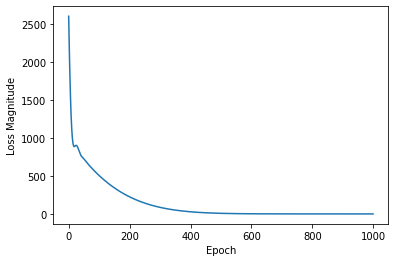

In [6]:
plt.xlabel('Epoch')
plt.ylabel('Loss Magnitude')
plt.plot(m_history.history['loss'])
#plt.yscale('log')
plt.show()

From this plot it is possible to note that approximately from the epoch 400, the loss function is so small that it presents no substancial changes (i.e. from the epoch 400 the algorithm foes not learn anything more).


---
Now the model has obtained the optimized parameters and is ready to be applied to new data. Using the method [.predict](https://keras.io/api/models/model_training_apis/) we can obtain the prediction for a new value. For example,

In [7]:
prediction = model.predict([100.0])

known_value = 212.0 #C2F(100.0)


print('Prediction = ', prediction)
print('Known value = ', known_value)

1/1 [==============================] - 0s 64ms/step
Prediction =  [[211.99109]]
Known value =  212.0


Note that the prediction is congruent with the known value.

---

Since this model is very simple, we can access the adjusted parameters during the training process. Hence, we use the method [.get_weights()](https://keras.io/api/layers/base_layer/) applied to the layer(s)

In [8]:
# Retrieves a layer from the model. In this case we have just one layer (output)
output_layer = model.get_layer(index=0) 

output_layer.get_weights()

[array([[1.8001728]], dtype=float32), array([31.97381], dtype=float32)]

These values correspond to the slope, $\frac{9}{5} = 1.8$, and the intercept, $32$, of the well known transformation equation,

\begin{equation}
ºF = \frac{9}{5} ºC + 32
\end{equation}

---

## A Neural Network with Multiples layers

Now we will include 2 hidden layers (with 3 neurons each) and the output layer (1 neuron) in the model.

In [9]:
hl1 = tf.keras.layers.Dense(units=3, input_shape=[1])
hl2 = tf.keras.layers.Dense(units=3)
outl = tf.keras.layers.Dense(units=1)

model2 = tf.keras.Sequential([hl1, hl2, outl])

In [10]:
model2.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [11]:
print('Entrendando...')

m_history2 = model2.fit(celsius, fahrenheit, epochs = 500, verbose=False)

print('Modelo entrenado!!')

Entrendando...
Modelo entrenado!!


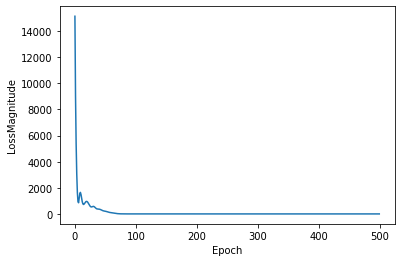

In [12]:
plt.xlabel('Epoch')
plt.ylabel('LossMagnitude')
plt.plot(m_history2.history['loss'])

In [16]:
prediction = model2.predict([100.0 ])

known_value = 212.0 #C2F(100.0)


print('Prediction = ', prediction)
print('Known value = ', known_value)

1/1 [==============================] - 0s 26ms/step
Prediction =  [[212.]]
Known value =  212.0


In [14]:
print(hl1.get_weights())
print(hl2.get_weights())
print(outl.get_weights())

[array([[ 0.12078666, -0.7443032 ,  0.49160752]], dtype=float32), array([-1.4493575, -6.5933623,  2.0692394], dtype=float32)]
[array([[-0.27775753, -0.23708609,  0.09285972],
       [ 0.52259135,  0.46156365,  1.7893255 ],
       [ 1.6574943 ,  0.5106641 ,  0.37931743]], dtype=float32), array([ 2.17983  , -2.3661253, -5.884912 ], dtype=float32)]
[array([[ 0.35609135],
       [-0.18797477],
       [-1.443889  ]], dtype=float32), array([5.7397733], dtype=float32)]


---

---

---

---

Here we have the function that gives the relation between tempereture in Celsius and Fahrenheit to create the input data.

In [ ]:
def C2F(c_deg):
  return (9/5)*c_deg + 32

celsius = np.array([-40., -30., -10., -5., 0., 8., 15., 22., 38., 50.])
fahrenheit = C2F(celsius)
fahrenheit

array([-40. , -22. ,  14. ,  23. ,  32. ,  46.4,  59. ,  71.6, 100.4,
       122. ])